In [1]:
using DataFrames
using Distributions
using LinearAlgebra
dot2(x) = dot(x, x)
using Plots
default(fmt=:png)
using RCall

In [2]:
data = [
    0.67 0.83
    0.66 1.34
    0.68 1.27
    0.68 1.53
    0.71 1.72
    0.71 1.54
    0.71 1.39
    0.72 1.23
    0.73 1.58
    0.7325 1.58
    0.74 1.60
    0.755 1.55
    0.755 1.63
    0.76 1.65
    0.765 1.5
    0.77 1.56
    0.77 1.4
    0.772 1.44
    0.773 1.74
    0.78 1.79
    0.7825 1.71
    0.7875 1.36
    0.7975 1.45
    0.795 1.52
    0.805 1.69
    0.82 1.65
    0.835 1.605
    0.8475 1.48
    0.865 1.36
    0.89 1.72
]
@show size(data)
X, Y = eachcol(data)
df = DataFrame(X = X, Y = Y);

size(data) = (30, 2)


In [3]:
function plot_ols(X, Y;
        xlim=(0.6, 1.0), ylim=(0.6, 2.0),
        xtick=0.6:0.1:1.0, ytick=0.6:0.2:2.0,
        size=(500, 450),
        α = 0.05,
        xguide = "gender gap index",
        yguide = "total fertility rate"
    )

    @show R = cor(X, Y)
    @show R^2
    
    n = length(X)
    A = [ones(n) X]
    @show β̂ = A \ Y
    Ŷ = A * β̂
    s = √(dot2(Y - Ŷ)/(n - 2))
    c = quantile(TDist(n - 2), 1 - α/2)
    f(x) = evalpoly(x, β̂)
    g(a, b) = s * √([a, b]' * (A'A \ [a, b]))
    g(x) = c * g(1, x)

    P = scatter(X, Y; label="", xlim, ylim, xtick, ytick)
    plot!(f; label="", ls=:dash, c=2)
    plot!(x -> f(x) + g(x); label="", ls=:dot, c=2)
    plot!(x -> f(x) - g(x); label="", ls=:dot, c=2)
    plot!(; xguide, yguide)
    
    ci_β₁() = [β̂[2] - c * g(0, 1), β̂[2] + c * g(0, 1)]
    pval_β₁(β₁) = 2ccdf(TDist(n - 2), abs((β̂[2] - β₁)/g(0, 1)))
    @show α
    @show ci = ci_β₁()
    @show pval = pval_β₁(0)
    
    Q = plot(pval_β₁, β̂[2] - 4g(0, 1), β̂[2] + 4g(0, 1); label="")
    vline!([β̂[2]]; label="estimate of β₁", ls=:dash, c=2)
    vline!([0.0]; label="", c=:black, lw=0.5)
    plot!(ci, fill(α, 2); label="$(100(1-α))% CI", lw=2, c=2)
    plot!(ytick=0:0.05:1, xguide="β₁", yguide="P-value")
    
    plot(P, Q; size=(1000, 450))
    plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)
end

plot_ols (generic function with 1 method)

* https://twitter.com/nhk_news/status/1648537152706191362
* https://www3.nhk.or.jp/news/special/news_seminar/jiji/jiji133/

<img src="IMG_9568.jpg" width="640">

R = cor(X, Y) = 0.41477919445032474
R ^ 2 = 0.1720417801488603
β̂ = A \ Y = [0.43710059208204266, 1.4125716513627948]
α = 0.05
ci = ci_β₁() = [0.2129756784822372, 2.6121676242433525]
pval = pval_β₁(0) = 0.022663207605639057


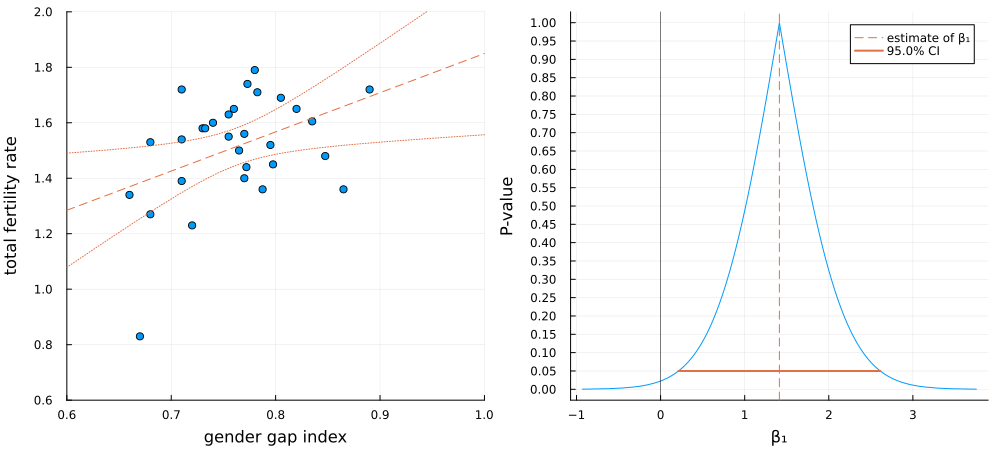

In [4]:
plot_ols(X, Y)

R = cor(X, Y) = 0.41477919445032474
R ^ 2 = 0.1720417801488603
β̂ = A \ Y = [0.43710059208204266, 1.4125716513627948]
α = 0.02
ci = ci_β₁() = [-0.03224430620125007, 2.8573876089268397]
pval = pval_β₁(0) = 0.022663207605639057


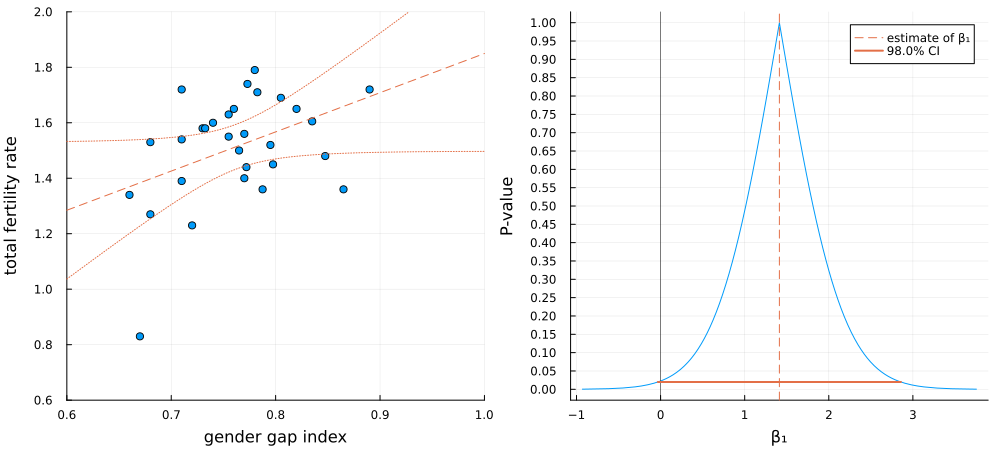

In [5]:
plot_ols(X, Y; α = 0.02)

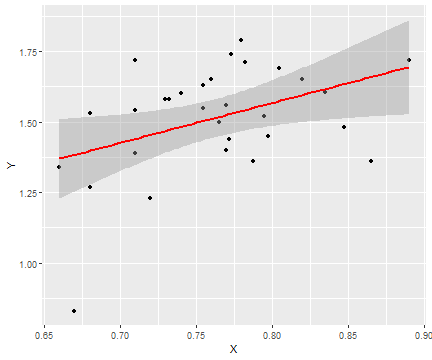

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [6]:
@rput df
R"""
library(ggplot2)
ggplot(df, aes(x = X, y = Y)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")
"""

R = cor(X, Y) = 0.29642673827427946
R ^ 2 = 0.08786881116392817
β̂ = A \ Y = [0.9329093990613099, 0.7897568387080532]
α = 0.05
ci = ci_β₁() = [-0.21500764571144548, 1.7945213231275519]
pval = pval_β₁(0) = 0.1184249372779967


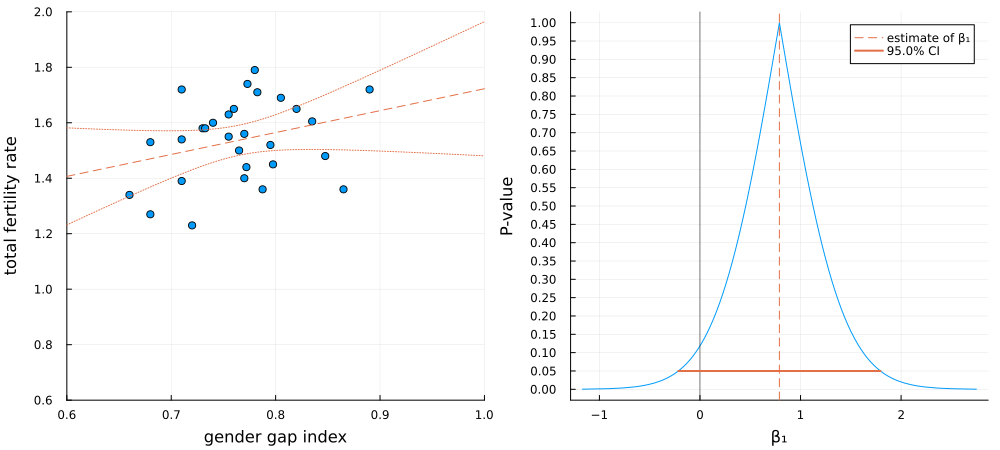

In [7]:
plot_ols(X[begin+1:end], Y[begin+1:end])

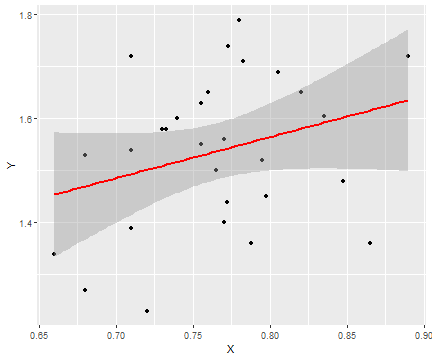

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [8]:
df1 = DataFrame(X = X[begin+1:end], Y = Y[begin+1:end])
@rput df1
R"""
library(ggplot2)
ggplot(df1, aes(x = X, y = Y)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")
"""

R = cor(X, Y) = 0.2198611477143899
R ^ 2 = 0.04833892427428877
β̂ = A \ Y = [1.050169669148377, 0.631714150596994]
α = 0.05
ci = ci_β₁() = [-0.49821261116664106, 1.7616409123606291]
pval = pval_β₁(0) = 0.2609375462470625


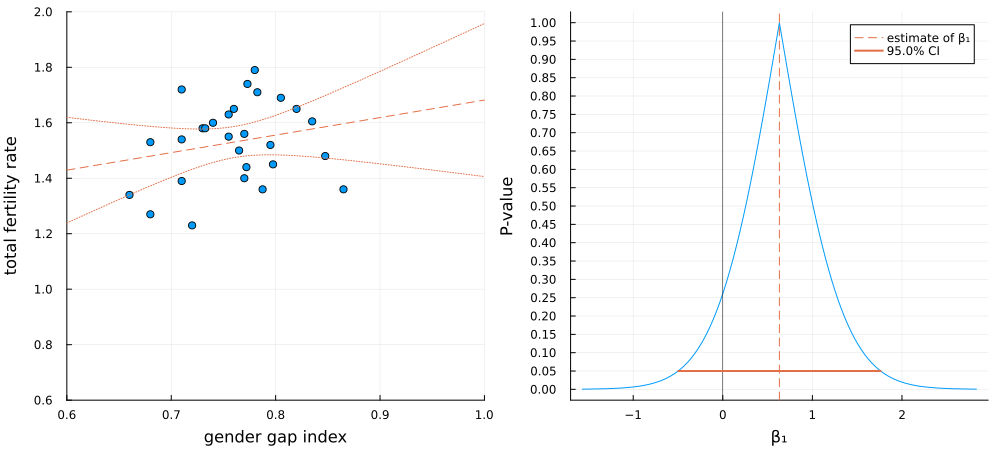

In [9]:
plot_ols(X[begin+1:end-1], Y[begin+1:end-1])

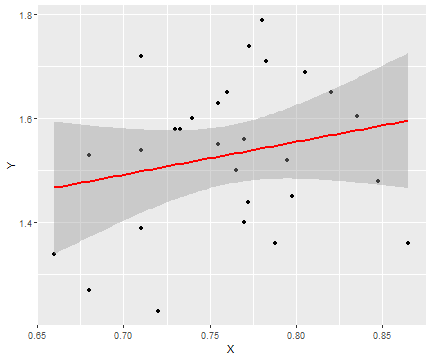

RObject{VecSxp}
`geom_smooth()` using formula = 'y ~ x'


In [10]:
df2 = DataFrame(X = X[begin+1:end-1], Y = Y[begin+1:end-1])
@rput df2
R"""
library(ggplot2)
ggplot(df2, aes(x = X, y = Y)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")
"""